In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy.stats import gaussian_kde
from PIL import Image

In [3]:
def conv_time(ms):
    ms = datetime.datetime.fromtimestamp(ms)
    return ms

In [78]:
fixations = pd.read_csv('./simone/oasis_mark/fixations.csv')

In [79]:
events = pd.read_csv('./simone/oasis_raw/raw/events.csv')

In [80]:
events

,recording id,timestamp [ns],name,type
0,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103620305000000,recording.begin,recording
1,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103711249000000,recording.end,recording


In [81]:
imu = pd.read_csv('./simone/oasis_raw/raw/imu.csv')

In [82]:
imu

,section id,recording id,timestamp [ns],gyro x [deg/s],gyro y [deg/s],gyro z [deg/s],acceleration x [G],acceleration y [G],acceleration z [G],roll [deg],pitch [deg],yaw [deg],quaternion w,quaternion x,quaternion y,quaternion z
0,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103709851627890,0.524521,0.669479,-0.017166,-0.019043,-0.147339,0.985718,1.731542,-9.098879,34.748163,0.951618,-0.080190,-0.009308,0.296490
1,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103709866208890,0.463486,0.486374,-0.139236,-0.028320,-0.158081,0.990112,1.731169,-9.098741,34.749218,0.951615,-0.080187,-0.009311,0.296499
2,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103709880789890,0.404358,0.789642,-0.200272,-0.020996,-0.152222,0.985718,1.729218,-9.097508,34.752449,0.951607,-0.080172,-0.009326,0.296528
3,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103709895370890,0.158310,0.425339,-0.078201,-0.030762,-0.144409,0.979858,1.729458,-9.094796,34.756492,0.951599,-0.080150,-0.009320,0.296562
4,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103709909951890,0.280380,0.547409,-0.078201,-0.029785,-0.152222,0.978393,1.729491,-9.093821,34.762950,0.951582,-0.080141,-0.009322,0.296616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103711232366890,-1.060486,0.911713,-0.444412,-0.025879,-0.154175,0.987183,1.647299,-8.955656,34.535371,0.952248,-0.078801,-0.009488,0.294828
174,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103711235732890,-0.875473,0.364304,-0.322342,-0.026855,-0.151733,1.000854,1.646860,-8.954335,34.528039,0.952268,-0.078789,-0.009483,0.294768
175,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103711239098890,-0.816345,0.728607,-0.322342,-0.030273,-0.147339,0.973022,1.647346,-8.953015,34.519372,0.952291,-0.078780,-0.009469,0.294696
176,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1697103711242464890,-1.001358,0.608444,-0.322342,-0.039062,-0.145386,0.986694,1.649680,-8.950800,34.510726,0.952315,-0.078769,-0.009438,0.294623


In [83]:
start = np.array(events['timestamp [ns]'].loc[(events['name']=='recording.begin')])[0]
end = np.array(events['timestamp [ns]'].loc[(events['name']=='recording.end')])[0]

In [84]:
fix =  fixations.loc[(fixations['fixation detected on surface'] == True)]

In [85]:
fix = fix.loc[(fix['start timestamp [ns]']>=start) & (fix['end timestamp [ns]']<=end)]

In [86]:
fix

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]
0,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,1,1697103620593236890,1697103624164279890,3571,True,0.524776,0.546555
1,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,2,1697103624211654890,1697103624436980890,225,True,0.707498,0.770903
3,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,4,1697103624661955890,1697103625118420890,456,True,0.662820,0.742634
4,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,5,1697103625155659890,1697103626827535890,1671,True,0.523035,0.521694
5,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,6,1697103627049494890,1697103627974510890,925,True,0.531399,0.517511
...,...,...,...,...,...,...,...,...,...
67,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,69,1697103689702634890,1697103694099859890,4397,True,0.499044,0.554058
68,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,70,1697103694133907890,1697103697974477890,3840,True,0.653578,0.506158
69,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,71,1697103698002625890,1697103699736994890,1734,True,0.529291,0.509381
70,9ee3e279-c123-4773-9ba5-b43d241d130b,e39c5c42-0449-4ac8-bb7b-ebb5f18d3e8e,72,1697103699757239890,1697103707196305890,7439,True,0.542826,0.596976


In [87]:
fix_x = fix['fixation x [normalized]']
fix_y = fix['fixation y [normalized]']

(0.0, 1.0)

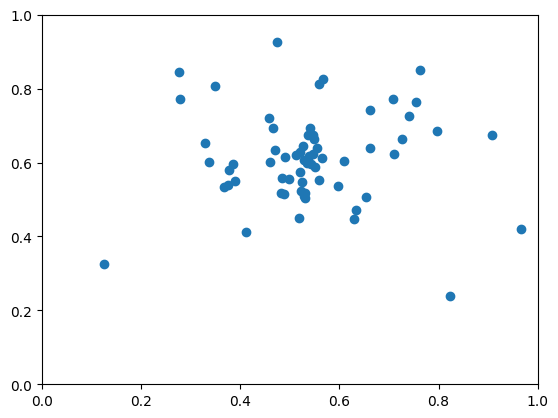

In [88]:
plt.scatter(fix_x,fix_y)
plt.xlim(fix_x.min(),fix_x.max())
plt.ylim(fix_y.min(),fix_y.max())
plt.xlim(0,1)
plt.ylim(0,1)

In [89]:
scale = 1000
fix_x *= scale
fix_y *= scale

In [93]:
fix_y = (fix_y-scale)*-1

In [116]:
background = np.array(Image.open('./simone/heatmap/overlay.jpeg'))

In [114]:
background = np.rot90(background,k=2)

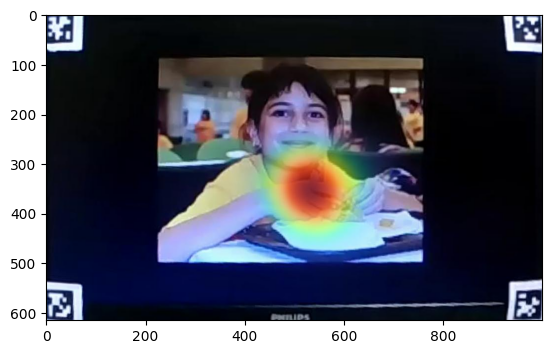

In [117]:
plt.imshow(background)

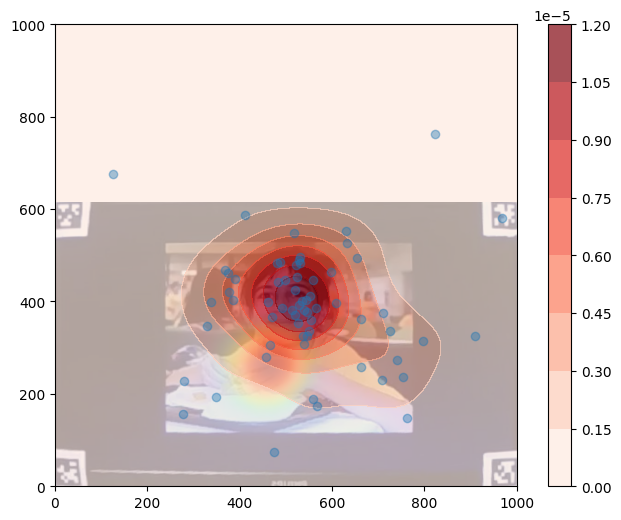

In [118]:
kde = gaussian_kde([fix_x, fix_y])
x_grid, y_grid = np.mgrid[0:scale:scale*1j, 0:scale:scale*1j]
z = kde(np.vstack([x_grid.ravel(), y_grid.ravel()]))
plt.figure(figsize=(8, 6))
plt.contourf(x_grid, y_grid, z.reshape(x_grid.shape), cmap='Reds', alpha=0.7)
plt.colorbar()
plt.scatter(fix_x,fix_y, alpha=0.4)
plt.imshow(np.rot90(background,k=2))
plt.xlim(0,scale)
plt.ylim(0,scale)
plt.show()

In [67]:
int(fix_x.min()*scale)

126

(0.0, 1.0)

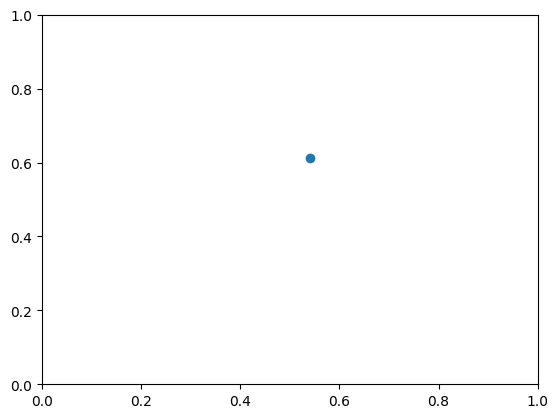

In [48]:
plt.scatter(fix_x.mean(),fix_y.mean())
plt.xlim(0,1)
plt.ylim(0,1)